In [1]:
from datapackage import Package

In [2]:
package = Package('https://datahub.io/core/co2-ppm/datapackage.json')

In [3]:
for resource in package.resource_names:
    print(resource)

validation_report
co2-mm-mlo_csv
co2-annmean-mlo_csv
co2-gr-mlo_csv
co2-mm-gl_csv
co2-annmean-gl_csv
co2-gr-gl_csv
co2-mm-mlo_json
co2-annmean-mlo_json
co2-gr-mlo_json
co2-mm-gl_json
co2-annmean-gl_json
co2-gr-gl_json
co2-ppm_zip
co2-mm-mlo
co2-annmean-mlo
co2-gr-mlo
co2-mm-gl
co2-annmean-gl
co2-gr-gl


In [4]:
co2_ppm_resource = package.get_resource('co2-mm-mlo_csv') 

In [5]:
co2_ppm_data = co2_ppm_resource.read()

In [6]:
import pandas as pd
df = pd.DataFrame(co2_ppm_data)

In [7]:
df.columns = ['date', 'decimal_date', 'average', 'interpolated', 'trend', 'num_days']
df.head()

,date,decimal_date,average,interpolated,trend,num_days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 6 columns):
date            727 non-null object
decimal_date    727 non-null object
average         727 non-null object
interpolated    727 non-null object
trend           727 non-null object
num_days        727 non-null object
dtypes: object(6)
memory usage: 34.2+ KB


In [11]:
df['date'] = pd.to_datetime(df['date'])
df['average'] = pd.to_numeric(df['average'])
df['interpolated'] = pd.to_numeric(df['interpolated'])
df['trend'] = pd.to_numeric(df['trend'])
df['num_days'] = pd.to_numeric(df['num_days'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 6 columns):
date            727 non-null datetime64[ns]
decimal_date    727 non-null object
average         727 non-null float64
interpolated    727 non-null float64
trend           727 non-null float64
num_days        727 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 34.2+ KB


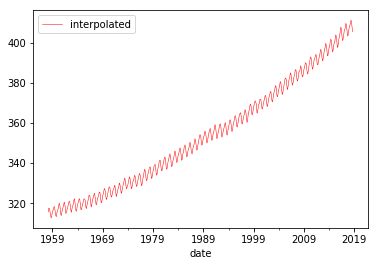

In [16]:
import matplotlib.pyplot as plt
ax = plt.gca()
df.plot(subplots=True, kind='line', x='date', y='interpolated', ax=ax, linewidth=0.5, color='red')
# plt.show()
plt.savefig('co2_ppm_rise.png', bbox_inches='tight')